In [151]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [152]:
df=pd.read_csv('C:/Users/THIRU/Documents/DATA SET/Drug.csv')

In [153]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [154]:
df=df.drop_duplicates()

In [155]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361 Reviews,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [156]:
df.isnull().any()

Condition       False
Drug            False
Indication      False
Type            False
Reviews         False
Effective       False
EaseOfUse       False
Satisfaction    False
Information     False
dtype: bool

In [157]:
df['Reviews'] = df['Reviews'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755.0,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437.0,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361.0,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [158]:
df.shape

(1753, 9)

In [159]:
df['Indication'].replace('\r\n', 'Unknown', inplace=True)

In [160]:
df['Type'].replace('\r\n', 'Unknown', inplace=True)

In [161]:
df['Condition'].value_counts()

fever                                        227
hypertension                                 215
Atopic Dermatitis                            172
endometriosis                                149
Bacterial Urinary Tract Infection            104
back pain                                     92
gastroesophageal reflux disease               92
gout                                          82
vertigo                                       60
hypercholesterolemia                          56
Pharyngitis due to Streptococcus Pyogenes     51
flatulence                                    45
hemorrhoids                                   42
edema                                         39
Acute Bacterial Sinusitis                     37
diverticulitis of gastrointestinal tract      36
Bacterial Conjunctivitis                      34
prevention of cerebrovascular accident        30
depression                                    28
vulvovaginal candidiasis                      27
fibromyalgia        

In [162]:
df['Drug'].value_counts()

Acetaminophen                                   79
Ibuprofen                                       43
Diphenhydramine Hcl                             40
Norethindrone-Ethin Estradiol                   30
Sulfamethoxazole-Trimethoprim                   30
                                                ..
Phenyleph-Min Oil-Petrolatum                     1
Diphenhydramine-Calamine, Pramoxine-Calamine     1
Famciclovir                                      1
Metronidazole In Nacl (Iso-Os)                   1
Losartan                                         1
Name: Drug, Length: 470, dtype: int64

In [163]:
df.groupby('Drug')['Reviews'].mean().sort_values(ascending=False).head()

Drug
Pregabalin     3066.000000
Lisinopril     2166.500000
Duloxetine     1593.333333
Meloxicam       813.000000
Simvastatin     806.000000
Name: Reviews, dtype: float64

In [164]:
df_grouped = df.groupby('Indication').agg({'Satisfaction': 'mean'}).reset_index()

In [165]:
df_grouped.head()

,Indication,Satisfaction
0,Off Label,3.069349
1,On Label,3.201934
2,Unknown,3.601667


<Axes: xlabel='Indication', ylabel='Satisfaction'>

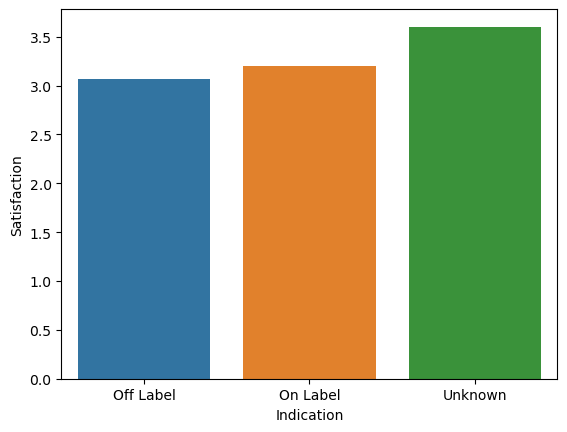

In [166]:
sns.barplot(x='Indication',y='Satisfaction',data=df_grouped)

<Axes: xlabel='Indication', ylabel='Effective'>

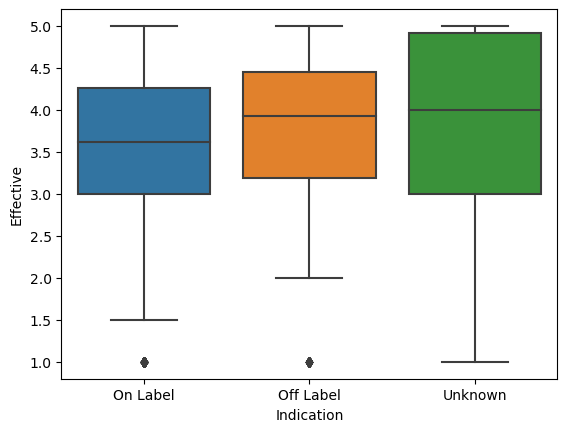

In [167]:
sns.boxplot(x='Indication',y='Effective',data=df)

<Axes: xlabel='Type', ylabel='Effective'>

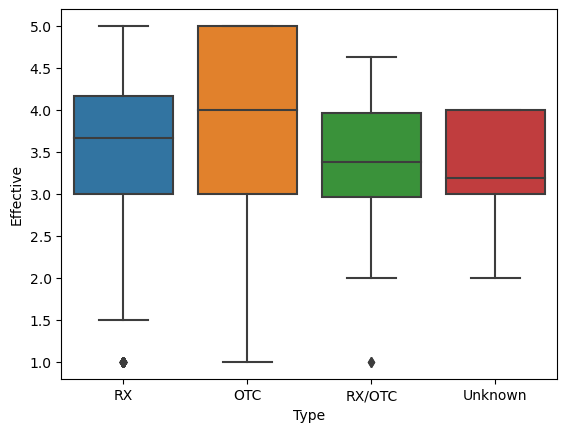

In [168]:
sns.boxplot(x='Type',y='Effective',data=df)

In [202]:
condition = 'hypertension'

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [204]:
features = ['EaseOfUse', 'Effective', 'Satisfaction', 'Information']

In [205]:
df['combined_features'] = df[features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [206]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information,combined_features
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,3.01 2.52 1.84 \r\n\t\t\t\t\tLevofloxacin is u...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755.0,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...,3.0 2.78 2.08 \r\n\t\t\t\t\t This is a generic...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...,4.01 3.21 2.57 \r\n\t\t\t\t\tAzithromycin is a...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437.0,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,3.23 3.26 2.42 \r\n\t\t\t\t\tAmoxicillin/clavu...
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361.0,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,2.96 2.44 1.68 \r\n\t\t\t\t\tLevofloxacin is u...


In [207]:
df_condition = df[df['Condition'] == condition]

In [208]:
df_condition.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information,combined_features
1666,hypertension,Lisinopril,On Label,RX,4268.0,3.40,4.00,2.72,\r\n\t\t\t\t\t This is a generic drug. The ave...,4.0 3.4 2.72 \r\n\t\t\t\t\t This is a generic ...
1668,hypertension,Atenolol,On Label,RX,1268.0,3.74,4.29,3.35,\r\n\t\t\t\t\tAtenolol is used with or without...,4.29 3.74 3.35 \r\n\t\t\t\t\tAtenolol is used ...
1669,hypertension,Nebivolol,On Label,RX,895.0,3.28,3.97,2.66,\r\n\t\t\t\t\tNebivolol is used to treat high ...,3.97 3.28 2.66 \r\n\t\t\t\t\tNebivolol is used...
1670,hypertension,Valsartan,On Label,RX,853.0,3.55,4.14,3.04,\r\n\t\t\t\t\tValsartan is used to treat high ...,4.14 3.55 3.04 \r\n\t\t\t\t\tValsartan is used...
1671,hypertension,Hydrochlorothiazide,On Label,RX,853.0,3.30,3.96,2.77,\r\n\t\t\t\t\tThis medication is used to treat...,3.96 3.3 2.77 \r\n\t\t\t\t\tThis medication is...


In [209]:
tfidf = TfidfVectorizer(stop_words='english')

In [210]:
tfidf_matrix = tfidf.fit_transform(df_condition['combined_features'])

In [211]:
tfidf_matrix

<215x348 sparse matrix of type '<class 'numpy.float64'>'
	with 7312 stored elements in Compressed Sparse Row format>

In [212]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [213]:
cosine_sim

array([[1.        , 0.21058557, 0.17829093, ..., 0.28155963, 0.19457878,
        0.22032936],
       [0.21058557, 1.        , 0.20052231, ..., 0.17558762, 0.20015548,
        0.23662826],
       [0.17829093, 0.20052231, 1.        , ..., 0.34455707, 0.21218925,
        0.23613295],
       ...,
       [0.28155963, 0.17558762, 0.34455707, ..., 1.        , 0.21719503,
        0.23549076],
       [0.19457878, 0.20015548, 0.21218925, ..., 0.21719503, 1.        ,
        0.3107959 ],
       [0.22032936, 0.23662826, 0.23613295, ..., 0.23549076, 0.3107959 ,
        1.        ]])

In [214]:
drug_indices = np.argsort(cosine_sim[-1])[:-6:-1]

In [215]:
drug_indices

array([214, 190,  54, 133, 128], dtype=int64)

In [216]:
print('Recommended drugs for {}:'.format(condition))
for idx in drug_indices[1:]:
    print('- {}'.format(df_condition.iloc[idx]['Drug']))

Recommended drugs for hypertension:
- Chlorthalidone
- Chlorthalidone
- Atenolol-Chlorthalidone
- Atenolol-Chlorthalidone
